## (Core) Preparing Time Series from Wide-Form Data

by Israel Diaz

## Task

You will be working with Zillow's publicly available Zillow House Value Index (ZHVI) https://www.zillow.com/research/data/

* Specifically, you will be using the Home Value data set for:
    * Data Type = "ZHVI All Homes (SFR+Condo/Coop) - Time Series - Smoothed - Seasonally Adjusted"
    * Geography = "City"
* We have already downloaded the file for you and uploaded it to Google Drive.
    * Share URL: https://drive.google.com/file/d/1O_g44QAfe3uVF-1heAC0BAeVDoWloVR-/view?usp=sharing
    * Direct URL (for Pandas): https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv

### Part 1

* First, you will prepare the dataset for time series analysis:
    * Load in the Zillow Home Value Index dataframe.
        * Note: it is a large file and may take a minute to load.
    * Filter the 4 largest cities into a new dataframe.
        * Tip: the "SizeRank" column has already ranked the cities by size. The larger the city, the smaller the rank value.
            * Therefore the 4 largest cities would have rank values of [0,1,2,3]
        Melt the data to long-form and prepare it for time series analysis.
        * Convert the melted dates into datetime datatype.
        * Make the datetime column the index.
    * Resample the dataframe as monthly frequency, grouped by City.

### Part 2

* Once you've prepared the dataframe with the time series data for the 4 largest cities:
    * Plot the home values for all 4 cities. (Hint: use unstack)
        * Make sure to add a title and axis labels.
        * Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")
            * Hint: use the FuncFormatter from matplotlib.
    * Answer the following 2 questions using pandas:
        * 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
            * Hint: use either pd.IndexSlice or .unstack() to get the answer.
        * 2) How much did the home values change from November 2008 to December 2008 (in dollars)?
            * Hint: you can use .diff() to calculate the change in values

## Solution

### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Customization Options
plt.style.use(['ggplot'])
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)

#import tick customization tools
import matplotlib.ticker as mticks
sns.set_context("talk", font_scale=0.9)

import os
# set random seed
SEED = 321
np.random.seed(SEED)

### load data

In [2]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv'

data = pd.read_csv(url)
data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


### Task 1

#### filter the 4 largest cities

In [4]:
largest_cities = data[data['SizeRank'] < 4]
largest_cities

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [5]:
largest_cities.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

#### melting data

In [6]:
lc_melted = pd.melt(largest_cities, id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
                                             'State', 'Metro', 'CountyName'], var_name='Date', value_name='value')
lc_melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


#### convert date to datetime

In [7]:
lc_melted['Date'] = pd.to_datetime(lc_melted['Date'])
lc_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   SizeRank    1092 non-null   int64         
 2   RegionName  1092 non-null   object        
 3   RegionType  1092 non-null   object        
 4   StateName   1092 non-null   object        
 5   State       1092 non-null   object        
 6   Metro       1092 non-null   object        
 7   CountyName  1092 non-null   object        
 8   Date        1092 non-null   datetime64[ns]
 9   value       1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 85.4+ KB


#### set date as index

In [8]:
lc_melted.set_index('Date', inplace=True)
lc_melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,value
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


#### Resampling the dataframe as monthly frequency, grouped by City.

In [9]:
lc_city = lc_melted.groupby('RegionName')['value'].resample('M').mean()
lc_city

RegionName  Date      
Chicago     2000-01-31    166139.0
            2000-02-29    166536.0
            2000-03-31    167368.0
            2000-04-30    168826.0
            2000-05-31    170499.0
                            ...   
New York    2022-05-31    768797.0
            2022-06-30    773944.0
            2022-07-31    777692.0
            2022-08-31    779960.0
            2022-09-30    781622.0
Name: value, Length: 1092, dtype: float64

### Task 2

#### Plot the home values for all 4 cities.

In [10]:
lc_unstacked = lc_city.unstack(level=0)
lc_unstacked

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-01-31,166139.0,109068.0,234181.0,253690.0
2000-02-29,166536.0,109079.0,234401.0,255517.0
2000-03-31,167368.0,108878.0,235513.0,257207.0
2000-04-30,168826.0,108881.0,237589.0,260310.0
2000-05-31,170499.0,108834.0,240113.0,263204.0
...,...,...,...,...
2022-05-31,312487.0,265558.0,990391.0,768797.0
2022-06-30,314663.0,268901.0,992337.0,773944.0
2022-07-31,315910.0,271059.0,992630.0,777692.0


There are values that are zeros, I will replace them with the last values (ffill) because is not posible that houses were sold for 0 dollars.

In [11]:
## replacing zeros with nan values first
lc_unstacked.replace(0, np.nan, inplace=True)
## replacing nan values with last values
lc_unstacked.fillna(method='ffill', inplace=True)
lc_unstacked

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-01-31,166139.0,109068.0,234181.0,253690.0
2000-02-29,166536.0,109079.0,234401.0,255517.0
2000-03-31,167368.0,108878.0,235513.0,257207.0
2000-04-30,168826.0,108881.0,237589.0,260310.0
2000-05-31,170499.0,108834.0,240113.0,263204.0
...,...,...,...,...
2022-05-31,312487.0,265558.0,990391.0,768797.0
2022-06-30,314663.0,268901.0,992337.0,773944.0
2022-07-31,315910.0,271059.0,992630.0,777692.0


In [12]:
## functions definitions

def format_xdates(ax, fig=None, xtick_fontweight='bold',
                  title= None):
    """Formats x-axis with minor ticks every 3 months, and major
    ticks every year. Includes different grid options for visibility"""
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(),
                       fontweight=xtick_fontweight)

    ## Making major/minor gridlines visually distance
    ax.grid(which='major',axis='x',color='k', linestyle=':', linewidth=1)
    if fig is None:
        fig = ax.get_figure()
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=0,ha='center')
    return fig,ax

def millions(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000_000
    return f"{new_x:,.0f}M"


def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"

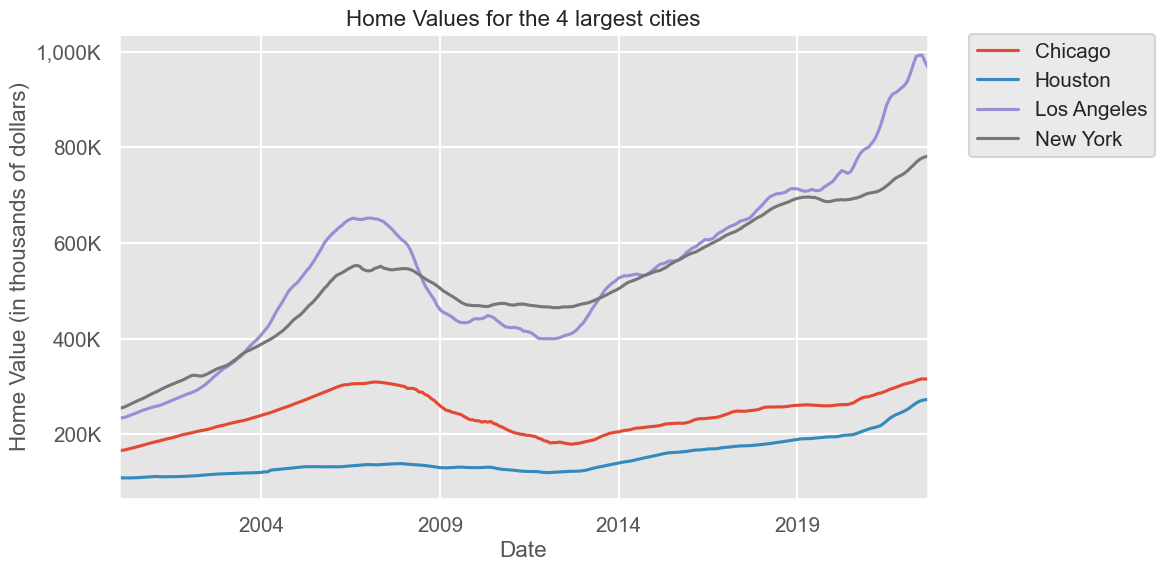

In [13]:
fig, ax = plt.subplots(figsize=(12,6))
lc_unstacked.plot(ax=ax, title='Home Values for the 4 largest cities')
# Create the formatters
fmt_thous = mticks.FuncFormatter(thousands)
## Set the axis' major formatter
ax.yaxis.set_major_formatter(fmt_thous)
## label names
ax.set_ylabel('Home Value (in thousands of dollars)')
ax.set_xlabel('Date')
#format_xdates(ax, fig=fig, xtick_fontweight='bold', title= None)
#legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#tight layout
plt.tight_layout()

#### 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [14]:
values_200812 = lc_unstacked.loc['2008-12-31'].sort_values(ascending=False)
values_200812

RegionName
New York       510309.0
Los Angeles    469294.0
Chicago        265306.0
Houston        131283.0
Name: 2008-12-31 00:00:00, dtype: float64

In [15]:
print(f'The city with the highest Typical Home Value at the end of 2008 was {values_200812.index[0]} with a value of {values_200812.iloc[0]}, and the lowest was {values_200812.index[-1]} with a value of {values_200812.iloc[-1]}')

The city with the highest Typical Home Value at the end of 2008 was New York with a value of 510309.0, and the lowest was Houston with a value of 131283.0


#### 2) How much did the home values change from November 2008 to December 2008 (in dollars)?

Hint: you can use .diff() to calculate the change in values

In [16]:
diff_val = lc_unstacked['2008-11':'2008-12'].diff().sum().sort_values(ascending=False)
diff_val

RegionName
Houston         -964.0
New York       -4458.0
Chicago        -5753.0
Los Angeles   -12611.0
dtype: float64

In [17]:
perc_ch = lc_unstacked['2008-11':'2008-12'].pct_change().sum().sort_values(ascending=False)*100
perc_ch

RegionName
Houston       -0.728939
New York      -0.866023
Chicago       -2.122416
Los Angeles   -2.616906
dtype: float64

In [18]:
print(f'The home values changed from November 2008 to December 2008 in the following way: \n* {diff_val.index[0]} changed by {diff_val.iloc[0]:,.0f} dollars or {perc_ch.iloc[0]:,.2f}%, \n* {diff_val.index[1]} changed by {diff_val.iloc[1]:,.0f} dollars or {perc_ch.iloc[1]:,.2f}%, \n* {diff_val.index[2]} changed by {diff_val.iloc[2]:,.0f} dollars or {perc_ch.iloc[2]:,.2f}%, \n* {diff_val.index[3]} changed by {diff_val.iloc[3]:,.0f} dollars or {perc_ch.iloc[3]:,.2f}%.')

The home values changed from November 2008 to December 2008 in the following way: 
* Houston changed by -964 dollars or -0.73%, 
* New York changed by -4,458 dollars or -0.87%, 
* Chicago changed by -5,753 dollars or -2.12%, 
* Los Angeles changed by -12,611 dollars or -2.62%.
